In [42]:

import sys
sys.path.insert(0, '../Utilities/')
import os

from scipy.interpolate import griddata
from pyDOE import lhs
from plotting import newfig, savefig
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io
from pysr import PySRRegressor
import pandas as pd

In [43]:

# Carga los archivos .xlsx
file1 = '../DataExperiments/WT_in_LB_data_s1.XLSX'
file2 = '../DataExperiments/different_conditions_data_s2.XLSX'

# Lee las hojas de los archivos
df1 = pd.read_excel(file1, engine='openpyxl')  # Especifica la hoja si es necesario: sheet_name='nombre_hoja'
df2 = pd.read_excel(file2, engine='openpyxl')

# Muestra los DataFrames
print("Archivo 1:")
display(df1)

print("Archivo 2:")
display(df2)


Archivo 1:


,Cycle Nr.,Time [s],Temp. [°C],G4,G5,G6,G7,G8,G9,G10,G11,G12,H1,H2,H3,H4,H5,H6
0,1,0.0,30.8,0.0922,0.0928,0.0928,0.0931,0.0928,0.0927,0.0916,0.0921,0.0911,0.0936,0.0925,0.0918,0.0929,0.0931,0.0931
1,2,678.6,30.7,0.0951,0.0957,0.0959,0.0959,0.0957,0.0953,0.0947,0.0951,0.0941,0.0970,0.0958,0.0951,0.0963,0.0963,0.0962
2,3,1357.1,30.4,0.0951,0.0958,0.0957,0.0960,0.0958,0.0954,0.0947,0.0951,0.0943,0.0971,0.0959,0.0952,0.0965,0.0964,0.0963
3,4,2035.7,30.2,0.0955,0.0962,0.0961,0.0965,0.0964,0.0958,0.0950,0.0957,0.0947,0.0975,0.0964,0.0957,0.0969,0.0969,0.0969
4,5,2714.2,30.0,0.0960,0.0969,0.0965,0.0968,0.0968,0.0964,0.0956,0.0963,0.0953,0.0981,0.0969,0.0961,0.0974,0.0973,0.0973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,335199.8,30.8,0.8186,0.8214,0.8188,0.8198,0.8221,0.8201,0.8296,0.8418,0.8292,0.4360,0.7711,0.8043,0.8181,0.8181,0.8153
495,496,335878.3,30.9,0.8184,0.8222,0.8185,0.8178,0.8201,0.8182,0.8277,0.8379,0.8274,0.4379,0.7729,0.8038,0.8198,0.8180,0.8154
496,497,336556.8,30.8,0.8183,0.8222,0.8169,0.8204,0.8214,0.8186,0.8287,0.8409,0.8289,0.4304,0.7719,0.8040,0.8187,0.8172,0.8154
497,498,337235.3,30.8,0.8172,0.8211,0.8194,0.8206,0.8227,0.8201,0.8303,0.8417,0.8280,0.4321,0.7717,0.8043,0.8194,0.8173,0.8143


Archivo 2:


,Unnamed: 0,Unnamed: 1,Unnamed: 2,kanamycin 1.25 ug/mL,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,kanamycin 2.50 ug/mL,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,LB,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
0,Cycle Nr.,Time [s],Temp. [°C],A1,A2,A3,A4,A5,A6,A7,...,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11
1,1,0,30,0.0929,0.0971,0.0948,0.0961,0.0939,0.0934,0.0938,...,0.0913,0.0914,0.0924,0.0916,0.0925,0.0921,0.092,0.093,0.0927,0.093
2,2,678.6,30.5,0.0925,0.0962,0.0946,0.0953,0.0935,0.0931,0.0933,...,0.0913,0.0916,0.0926,0.092,0.0914,0.0921,0.0921,0.0931,0.0932,0.0925
3,3,1357.2,30.1,0.0926,0.0962,0.095,0.0954,0.0936,0.0932,0.0932,...,0.0916,0.0917,0.0927,0.0918,0.0917,0.0922,0.0923,0.0932,0.0932,0.0927
4,4,2035.8,30,0.0928,0.0981,0.0949,0.0956,0.0937,0.0934,0.0934,...,0.092,0.0921,0.0931,0.0922,0.0922,0.0928,0.0926,0.0936,0.0937,0.093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,338,228685.2,29.9,0.5954,0.6453,0.6513,0.6593,0.6599,0.6576,0.5901,...,0.0926,0.0926,0.0935,0.0924,0.0949,1.0018,0.9769,0.9848,0.9871,0.9972
339,339,229363.7,29.8,0.5937,0.6448,0.6495,0.6568,0.6572,0.6564,0.5898,...,0.0926,0.0927,0.0934,0.0926,0.0953,1.0017,0.98,0.9857,0.9868,0.9976
340,340,230042.3,29.9,0.5923,0.6429,0.6487,0.6575,0.6589,0.6572,0.5889,...,0.0925,0.0925,0.0933,0.0923,0.0947,1.0009,0.9758,0.9833,0.9846,0.9963
341,341,230720.9,30.3,0.5912,0.6419,0.6484,0.6568,0.657,0.6548,0.5888,...,0.0923,0.0924,0.0932,0.0921,0.0942,1.0004,0.9763,0.9843,0.9845,0.9981


In [44]:
df1.iloc[:, 3:]

,G4,G5,G6,G7,G8,G9,G10,G11,G12,H1,H2,H3,H4,H5,H6
0,0.0922,0.0928,0.0928,0.0931,0.0928,0.0927,0.0916,0.0921,0.0911,0.0936,0.0925,0.0918,0.0929,0.0931,0.0931
1,0.0951,0.0957,0.0959,0.0959,0.0957,0.0953,0.0947,0.0951,0.0941,0.0970,0.0958,0.0951,0.0963,0.0963,0.0962
2,0.0951,0.0958,0.0957,0.0960,0.0958,0.0954,0.0947,0.0951,0.0943,0.0971,0.0959,0.0952,0.0965,0.0964,0.0963
3,0.0955,0.0962,0.0961,0.0965,0.0964,0.0958,0.0950,0.0957,0.0947,0.0975,0.0964,0.0957,0.0969,0.0969,0.0969
4,0.0960,0.0969,0.0965,0.0968,0.0968,0.0964,0.0956,0.0963,0.0953,0.0981,0.0969,0.0961,0.0974,0.0973,0.0973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.8186,0.8214,0.8188,0.8198,0.8221,0.8201,0.8296,0.8418,0.8292,0.4360,0.7711,0.8043,0.8181,0.8181,0.8153
495,0.8184,0.8222,0.8185,0.8178,0.8201,0.8182,0.8277,0.8379,0.8274,0.4379,0.7729,0.8038,0.8198,0.8180,0.8154
496,0.8183,0.8222,0.8169,0.8204,0.8214,0.8186,0.8287,0.8409,0.8289,0.4304,0.7719,0.8040,0.8187,0.8172,0.8154
497,0.8172,0.8211,0.8194,0.8206,0.8227,0.8201,0.8303,0.8417,0.8280,0.4321,0.7717,0.8043,0.8194,0.8173,0.8143


In [45]:
N_exp=df1.iloc[:, 3:].shape[1]


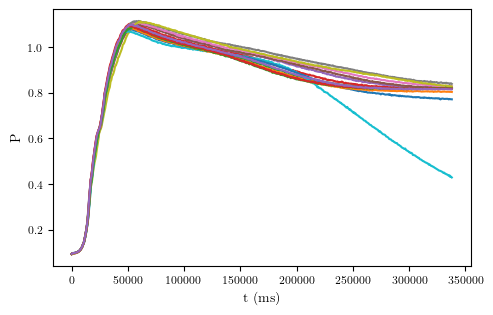

In [46]:
for i in range(N_exp):
    plt.plot(df1['Time [s]'],df1.iloc[:, 3+i])
plt.xlabel('t (ms)')
plt.ylabel('P ')
plt.show()


In [47]:
c=-1
P_exp=np.array(df1.iloc[:, 3:].drop('H1',axis=1))[:c]
T_exp=np.array(df1['Time [s]'])[:c]

T_max=max(T_exp)
T_exp=T_exp/max(T_exp)
N_exp=P_exp.shape[1]
N_exp,T_max

(14, 337235.3)

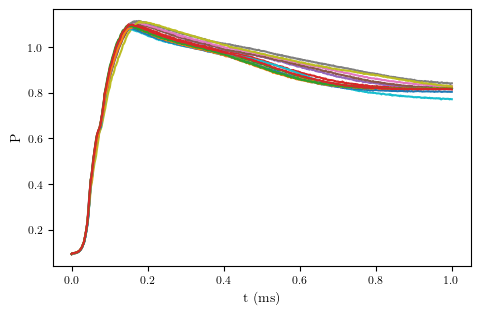

In [48]:

for i in range(N_exp):
    plt.plot(T_exp,P_exp[:, i])
plt.xlabel('t (ms)')
plt.ylabel('P ')
plt.show()

In [49]:
N_f = 100 # Number of residual point
N_d = 300 #Number of data

u_star = P_exp.T.flatten().reshape([-1,1])
X_star = np.tile(T_exp,N_exp).reshape([-1,1])

# Doman bounds
lb = X_star.min(0)
ub = X_star.max(0)  

# Initial Condition
xx1 = X_star[::len(T_exp)]
uu1 = u_star[::len(T_exp)]

# Additional data
idx = np.random.choice(u_star.shape[0], N_d-len(uu1), replace=False)
xxd = X_star[idx]
uud = u_star[idx]

X_u_train = np.concatenate((xx1,xxd)).reshape([-1,1])
u_train = np.concatenate((uu1,uud)).reshape([-1,1])

X_f_train = lb + (ub-lb)*lhs(1, N_f)
# X_f_train = np.vstack((X_f_train, X_u_train))

X_u_train_tf = tf.convert_to_tensor(X_u_train, dtype=tf.float32)
u_train_tf =   tf.convert_to_tensor(u_train, dtype=tf.float32)
X_f_train_tf = tf.convert_to_tensor(X_f_train, dtype=tf.float32)
u_star_tf = tf.convert_to_tensor(u_star, dtype=tf.float32)

In [50]:
np.random.seed(seed=1234)
tf.random.set_seed(1234)
tf.config.experimental.enable_tensor_float_32_execution(False)
#os.environ[‘TF_ENABLE_AUTO_MIXED_PRECISION’] = ‘1’



# Initalization of Network
def hyper_initial(size):
    in_dim = size[0]
    out_dim = size[1]
    std = np.sqrt(2.0/(in_dim + out_dim))
    return tf.Variable(tf.random.truncated_normal(shape=size, stddev = std))

# Neural Network 
def DNN(X, W, b):
    A = 2.0*(X - lb)/(ub - lb) - 1.0
    L = len(W)
    for i in range(L-1):
        A = tf.tanh(tf.add(tf.matmul(A, W[i]), b[i]))
    Y = tf.add(tf.matmul(A, W[-1]), b[-1])
    return Y

def train_vars(W, b):
    return W + b 

def train_vars_total(W, b, lambda_r, lambda_b):
    return W + b + lambda_r + lambda_b

def net(t, w, b):
    p = DNN(t, w, b)
    return p

def loss_weight(N_r, N_b):
    alpha_b = tf.Variable(tf.reshape(tf.repeat(1000.0, N_b), (N_b, -1))) 
    alpha_r = tf.Variable(tf.ones(shape=[N_r, 1]), dtype=tf.float32)
    return alpha_r, alpha_b

#@tf.function(jit_compile=True)
@tf.function()
def net_f(t, W_p, b_p, W_phi, b_phi):
    with tf.GradientTape(persistent=True) as tape1:
        tape1.watch([t])
        p=net(t, W_p, b_p)
        phi=net(p, W_phi, b_phi)
    p_t = tape1.gradient(p, t) 
    f = p_t - phi
    return f


#@tf.function()
@tf.function()
def train_step(W_p, b_p, W_phi, b_phi, X_u_train_tf, u_train_tf, X_f_train_tf, lambda_r, lambda_b, opt):
    t_u = X_u_train_tf
    t_f = X_f_train_tf

    with tf.GradientTape(persistent=True) as tape:
        tape.watch([W_p, b_p, W_phi, b_phi, lambda_r, lambda_b])
        u_nn = net(t_u, W_p, b_p) 
        f_nn = net_f(t_f, W_p, b_p, W_phi, b_phi)
        loss_u = tf.square(lambda_b*(u_nn - u_train_tf))
        loss_f = tf.square(lambda_r*f_nn) 
        loss =  tf.reduce_mean(loss_u) + tf.reduce_mean(loss_f)
    grads_p = tape.gradient(loss, train_vars(W_p, b_p))
    grads_phi = tape.gradient(loss, train_vars(W_phi, b_phi))
    grads_u = tape.gradient(loss, lambda_r)
    grads_b = tape.gradient(loss, lambda_b)

    opt.apply_gradients(zip(grads_p, train_vars(W_p, b_p)))
    opt.apply_gradients(zip(grads_phi, train_vars(W_phi, b_phi)))
    opt.apply_gradients(zip([-grads_u], [lambda_r]))
    opt.apply_gradients(zip([-grads_b], [lambda_b]))
   
    return loss, tf.reduce_mean(tf.square(u_nn - u_train_tf)), tf.reduce_mean(tf.square(f_nn) )




# N_u = 100 # Number of Initial and Boundary data points


layers = [1, 50, 50, 1]

L = len(layers)
W_p = [hyper_initial([layers[l-1], layers[l]]) for l in range(1, L)] 
b_p = [tf.Variable(tf.zeros([1, layers[l]])) for l in range(1, L)]
W_phi = [hyper_initial([layers[l-1], layers[l]]) for l in range(1, L)] 
b_phi = [tf.Variable(tf.zeros([1, layers[l]])) for l in range(1, L)]

lambda_r, lambda_b = loss_weight(N_f, N_d)

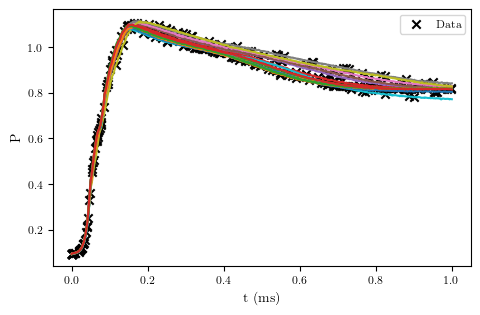

In [51]:
plt.scatter(X_u_train, u_train, marker='x', color='black',label='Data')

for i in range(N_exp):
    plt.plot(X_star[i*len(T_exp):(i+1)*len(T_exp)],u_star[i*len(T_exp):(i+1)*len(T_exp)])

# plt.scatter(X_f_train, np.zeros(len(X_f_train)), marker='x')
plt.legend()
plt.xlabel('t (ms)')
plt.ylabel('P')
# plt.savefig('figures/P_phi.pdf')
plt.show()

In [52]:
lr = 1e-4
# Nmax = 10**5
Nmax = 40000

optimizer = tf.optimizers.Adam(learning_rate=lr)

start_time = time.time()
n=0
loss = []
loss_unk=[]
while n <= Nmax:
    loss_, loss_u, loss_f = train_step(W_p, b_p, W_phi, b_phi, X_u_train_tf, u_train_tf, X_f_train_tf,  lambda_r, lambda_b, optimizer)
    loss.append(loss_)
    loss_unk.append(loss_f)
    if n % 10 == 0:
        print(f"Iteration is: {n}")
        print(f"Total loss is: {loss_}")

        print(f"Data loss is: {loss_u}")
        print(f"Physicial loss is: {loss_f}")

    n+=1

elapsed = time.time() - start_time                
print('Training time: %.4f' % (elapsed))

Iteration is: 0
Total loss is: 748693.25
Data loss is: 0.7486931085586548
Physicial loss is: 0.09417510777711868
Iteration is: 10
Total loss is: 716374.5625
Data loss is: 0.7163732051849365
Physicial loss is: 0.007003773469477892
Iteration is: 20
Total loss is: 674829.625
Data loss is: 0.6748262047767639
Physicial loss is: 0.025262057781219482
Iteration is: 30
Total loss is: 631552.875
Data loss is: 0.631547212600708
Physicial loss is: 0.033470284193754196
Iteration is: 40
Total loss is: 584020.0625
Data loss is: 0.5840128064155579
Physicial loss is: 0.0030015092343091965
Iteration is: 50
Total loss is: 533530.375
Data loss is: 0.533521831035614
Physicial loss is: 0.0032939326483756304
Iteration is: 60
Total loss is: 480474.78125
Data loss is: 0.480465292930603
Physicial loss is: 0.0037588111590594053
Iteration is: 70
Total loss is: 425175.1875
Data loss is: 0.4251653850078583
Physicial loss is: 0.0006006811745464802
Iteration is: 80
Total loss is: 368771.90625
Data loss is: 0.36876252

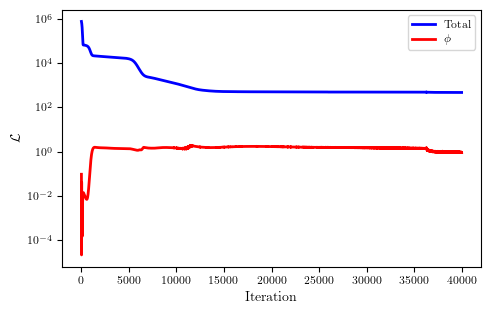

In [53]:
it = np.arange(0,Nmax, 1)
loss_list = [loss[i].numpy() for i in range(0,Nmax)]
loss_phi_list = [loss_unk[i].numpy() for i in range(0,Nmax)]

plt.semilogy(it, np.asarray(loss_list), 'b-', linewidth = 2, label = 'Total')  
plt.semilogy(it, np.asarray(loss_phi_list), 'r-', linewidth = 2, label = '$\phi$')       

plt.xlabel('Iteration')
plt.ylabel('$\mathcal{L}$')  
plt.legend()  
# plt.savefig('figures/loss_phi.pdf')
plt.show()

In [54]:
def predict(X_star_tf, w, b):
    x_star = X_star_tf
    u_pred = net(x_star, w, b)
    return u_pred

## Evaluating total function
X_star_tf = tf.convert_to_tensor(X_star[:len(T_exp)], dtype=tf.float32)    
u_pred = predict(X_star_tf, W_p, b_p)

## Evaluating unknown function
u_pred_tf = tf.convert_to_tensor(u_pred, dtype=tf.float32) 
phi_pred = predict(u_pred_tf, W_phi, b_phi)

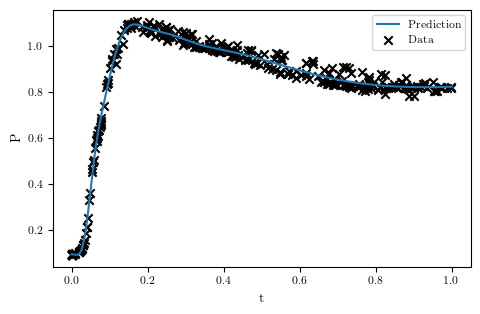

In [55]:
plt.plot(X_star[:len(T_exp)], u_pred, label='Prediction')
# for i in range(N_exp):
#     plt.plot(X_star[i*len(T_exp):(i+1)*len(T_exp)],u_star[i*len(T_exp):(i+1)*len(T_exp)],linestyle=':')

plt.scatter(X_u_train, u_train, marker='x', color='black',label='Data')
# plt.scatter(X_f_train, np.zeros(len(X_f_train)), marker='x')
plt.legend()
plt.xlabel('t')
plt.ylabel('P')
# plt.savefig('figures/P_phi.pdf')
plt.show()

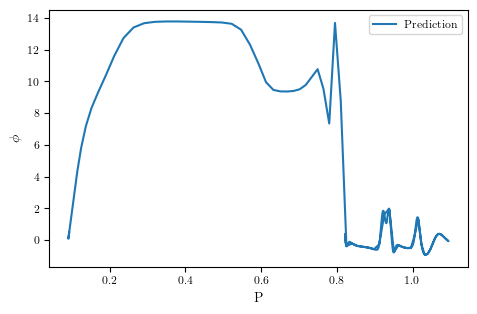

In [56]:
plt.plot(u_pred, phi_pred, label='Prediction')
# plt.scatter(X_u_train, u_train, marker='x', color='black',label='Data')
# plt.scatter(X_f_train, np.zeros(len(X_f_train)), marker='x')
plt.legend()
plt.xlabel('P')
plt.ylabel('$\phi$')
# plt.savefig('figures/phi.pdf')
plt.show()

In [57]:
Nt=10000
T_symb=np.zeros(Nt)
P_int=np.zeros(Nt)
dt=0.0001

T_symb[0]=0
P_int[0]=np.mean(uu1) #Initial conditions

for i in range(1,Nt):
    P_int[i]=P_int[i-1]+predict(tf.convert_to_tensor(np.reshape(P_int[i-1],[-1,1]), dtype=tf.float32) , W_phi, b_phi)*dt
    T_symb[i]=T_symb[i-1]+dt

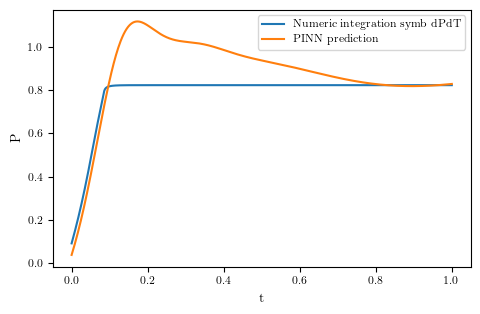

In [41]:
plt.plot(T_symb, P_int, label='Numeric integration symb dPdT')

plt.plot(X_star[:len(T_exp)], u_pred, label='PINN prediction')
plt.xlabel('t')
plt.ylabel('P')
plt.legend()
plt.show()

In [178]:
# Create and train the PySR model
model_phi = PySRRegressor(
    niterations=100,
    binary_operators=["+", "*"],
    # unary_operators=["inv(x) = 1/x"],
    # unary_operators=["exp","inv(x) = 1/x"],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    progress=True  # Show progress during training
)

In [179]:
# Fit phi
model_phi.fit(u_pred_tf, np.array(phi_pred))
print(model_phi)

c:\Users\julia\anaconda3\envs\pinns\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 2.500e+05
Head worker occupation: 38.3%
Progress: 553 / 1500 total iterations (36.867%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
3           7.199e+00  5.314e+00  y = 1.9516 * 0.31396
5           5.070e+00  1.753e-01  y = (-7.3199 * x₀) + 7.0106
9           5.017e+00  2.634e-03  y = ((x₀ * x₀) + -0.94507) * (x₀ + -5.736)
11          2.557e+00  3.369e-01  y = (x₀ * (-61.235 + (x₀ * 68.184))) * (x₀ + -1.0877)
13          2.251e+00  6.368e-02  y = (-1.1098 + (x₀ * x₀)) * (x₀ * (-51.852 + (x₀ * 60.374)))
15          1.412e+00  2.334e-01  y = (-0.86298 + x₀) * (((((x₀ * 10.759) + -12.211) * 13.489) *...
                                   x₀) + 12.875)
17          1.411e+00  4.002e-04  y = (((-0.07906 + x₀) * ((-10.73 + (11.919 * x₀)) * 12.337)) *...
                                   (x₀ + -1.0166)) + -0.67422
19          1.411e+00  -0.000e+00

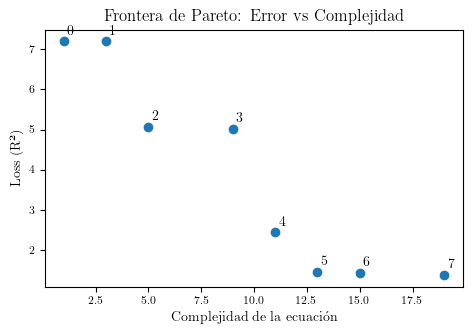

In [181]:
# Extraer las métricas de las ecuaciones
equations_df = model_phi.equations_
# Obtener la complejidad y la puntuación (score) de cada ecuación
complejidades = equations_df['complexity']
errores = equations_df['loss']  # Por ejemplo, error MSE o cualquier métrica utilizada

# Crear el gráfico de dispersión
plt.scatter(complejidades, errores)

# Añadir etiquetas de índice en cada punto
for i, (x, y) in enumerate(zip(complejidades, errores)):
    plt.annotate(i, (x, y), textcoords="offset points", xytext=(5,5), ha='center')

# Añadir etiquetas y título
plt.xlabel('Complejidad de la ecuación')
plt.ylabel('Loss (R²)')
plt.title('Frontera de Pareto: Error vs Complejidad')

# Mostrar gráfico
plt.show()

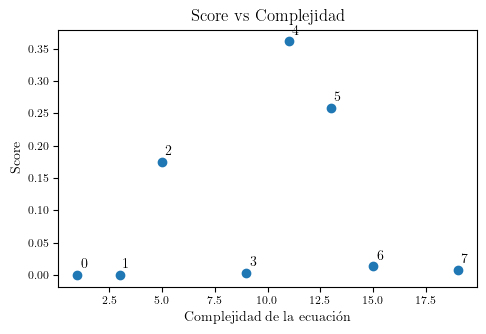

In [182]:
# Extraer complejidad y score
complejidades = equations_df['complexity']
scores = equations_df['score']

# Graficar score vs complejidad
plt.scatter(complejidades, scores)

# Añadir etiquetas de índice en cada punto
for i, (x, y) in enumerate(zip(complejidades, scores)):
    plt.annotate(i, (x, y), textcoords="offset points", xytext=(5,5), ha='center')


plt.xlabel('Complejidad de la ecuación')
plt.ylabel('Score')
plt.title('Score vs Complejidad')
plt.show()


In [183]:
chose=4
model_phi.sympy(chose)

x0*(x0 - 0.8758926)*(83.00927*x0 - 87.98476)

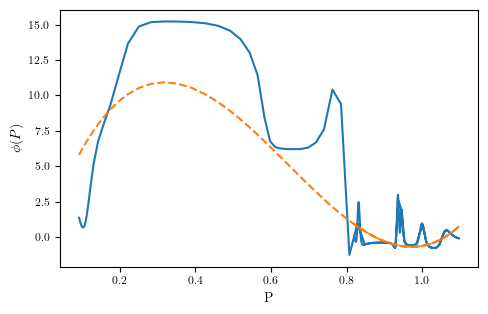

In [184]:
symb1=model_phi.predict(u_pred,chose)
plt.plot(u_pred, phi_pred, label='PINN prediction')
plt.plot(u_pred, symb1, linestyle='--', label='Symbolic regresion')

plt.xlabel('P')
plt.ylabel('$\phi (P)$')
plt.show()

In [185]:
Nt=10000
P_symb=np.zeros(Nt)
T_symb=np.zeros(Nt)
dt=0.0001

P_symb[0]=np.mean(uu1) #Initial conditions
T_symb[0]=0

for i in range(1,Nt):
    P_symb[i]=P_symb[i-1]+model_phi.predict(np.reshape(P_symb[i-1],[-1,1]),chose)*dt
    T_symb[i]=T_symb[i-1]+dt

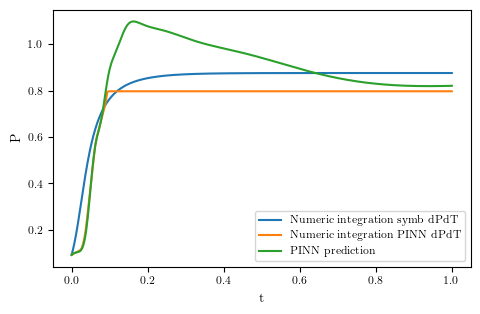

: 

In [187]:
plt.plot(T_symb, P_symb, label='Numeric integration symb dPdT')
plt.plot(T_symb, P_int, label='Numeric integration PINN dPdT')
plt.plot(X_star[:len(T_exp)], u_pred, label='PINN prediction')
plt.xlabel('t')
plt.ylabel('P')
plt.legend()
plt.show()
